In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load the data
df = pd.read_csv('features2.csv')

In [3]:
df.dropna(inplace=True)

In [4]:
# Separate features and labels
X = df.drop(columns=['label'])
y = df['label']

In [5]:
# Encode the labels
le = LabelEncoder()
y = le.fit_transform(y)

In [6]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Feature selection using SelectKBest with ANOVA F-value
k_best = SelectKBest(score_func=f_classif, k=10)  # Choose top 10 features
X_train_kbest = k_best.fit_transform(X_train, y_train)
X_test_kbest = k_best.transform(X_test)

In [8]:
# Feature selection using SelectKBest with mutual information
k_best_mi = SelectKBest(score_func=mutual_info_classif, k=10)  # Choose top 10 features
X_train_kbest_mi = k_best_mi.fit_transform(X_train, y_train)
X_test_kbest_mi = k_best_mi.transform(X_test)

In [9]:
# Train a RandomForestClassifier and get feature importances
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_

In [10]:
# Get the indices of the most important features
indices = importances.argsort()[-10:][::-1]

In [11]:
# Train a model with selected features from RandomForest
X_train_rf = X_train.iloc[:, indices]
X_test_rf = X_test.iloc[:, indices]

In [12]:
# Train and evaluate models
models = {
    'SelectKBest_f_classif': (X_train_kbest, X_test_kbest),
    'SelectKBest_mutual_info': (X_train_kbest_mi, X_test_kbest_mi),
    'RandomForest_importances': (X_train_rf, X_test_rf)
}

In [13]:
for name, (X_train_sel, X_test_sel) in models.items():
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_sel, y_train)
    y_pred = model.predict(X_test_sel)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with {name}: {accuracy:.4f}')

Accuracy with SelectKBest_f_classif: 0.9500
Accuracy with SelectKBest_mutual_info: 0.9500
Accuracy with RandomForest_importances: 0.9500


In [14]:
# Display the selected features
selected_features = X.columns[indices]
print('Top 10 features selected by RandomForest:', selected_features)

Top 10 features selected by RandomForest: Index(['n_samples', 'acce_min_z', 'gyro_variance_y', 'gyro_kurt_y',
       'gyro_std_y', 'gyro_energy_y', 'gyro_mean_y', 'gyro_rms_z',
       'gyro_kurt_z', 'gyro_rms_y'],
      dtype='object')


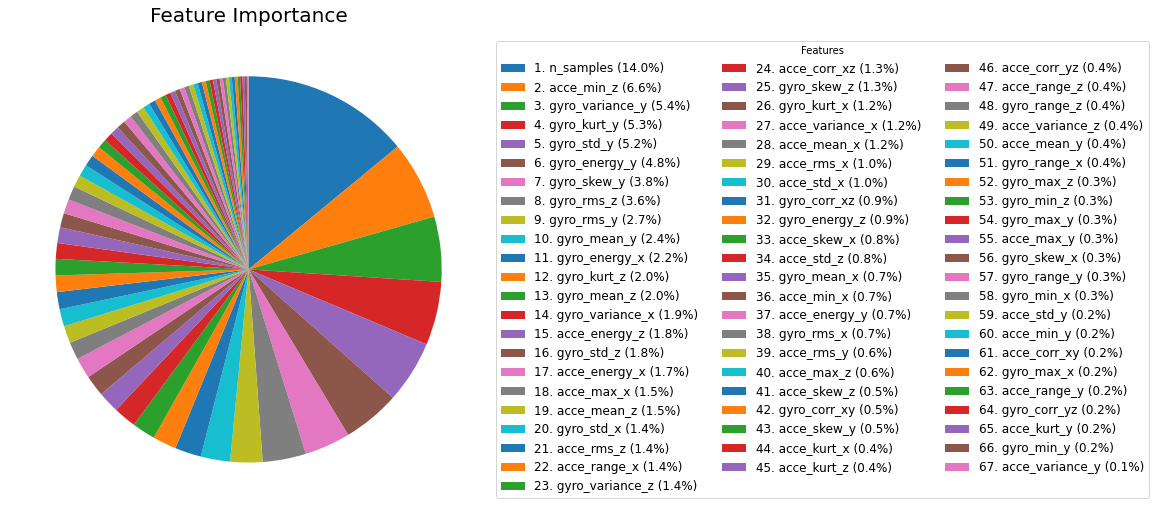

In [59]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Train a RandomForestClassifier model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
indices = importances.argsort()[::-1]

# Plot feature importances as a pie chart
plt.figure(figsize=(16, 16))
plt.title("Feature Importance", fontsize=20)  # Adjust the fontsize here

# Create the pie chart without the percentage labels
wedges, texts = plt.pie(importances[indices], startangle=90, counterclock=False)

# Add a legend with ranking numbers, feature names, and percentages, and 4 columns to the right of the chart
legend_labels = [f"{i+1}. {X.columns[idx]} ({importances[idx]*100:.1f}%)"
                 for i, idx in enumerate(indices)]
plt.legend(wedges, legend_labels, title="Features", loc="center left", bbox_to_anchor=(1, 0.5), ncol=3, fontsize='large')

plt.tight_layout()
plt.show()


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score

# Load the data
df = pd.read_csv('features2.csv')
df.dropna(inplace=True)

# Separate features and labels
X = df.drop(columns=['label'])
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf = RandomForestClassifier(n_estimators=50, random_state=42)

# Perform RFECV to select the optimal number of features
rfecv = RFECV(estimator=rf, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train, y_train)

# Get the optimal number of features
optimal_num_features = rfecv.n_features_
print(f'Optimal number of features: {optimal_num_features}')

# Get the support and ranking of the features
selected_features = X_train.columns[rfecv.support_]
print(f'Selected features: {selected_features}')

# Get the performance of the model with the selected features
y_pred = rfecv.predict(X_test)
model_accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy with selected features: {model_accuracy}')


Optimal number of features: 48
Selected features: Index(['n_samples', 'gyro_mean_x', 'gyro_mean_y', 'gyro_mean_z', 'acce_mean_x',
       'acce_mean_y', 'acce_mean_z', 'gyro_std_x', 'gyro_std_y', 'gyro_std_z',
       'acce_std_x', 'acce_std_z', 'gyro_variance_x', 'gyro_variance_y',
       'gyro_variance_z', 'acce_variance_x', 'acce_variance_z', 'gyro_skew_y',
       'gyro_skew_z', 'acce_skew_x', 'acce_skew_z', 'gyro_kurt_x',
       'gyro_kurt_y', 'gyro_kurt_z', 'acce_kurt_x', 'acce_kurt_z',
       'gyro_max_z', 'acce_max_x', 'acce_min_x', 'acce_min_z', 'gyro_range_z',
       'acce_range_x', 'acce_range_z', 'gyro_rms_x', 'gyro_rms_y',
       'gyro_rms_z', 'acce_rms_x', 'acce_rms_y', 'acce_rms_z', 'gyro_energy_x',
       'gyro_energy_y', 'gyro_energy_z', 'acce_energy_x', 'acce_energy_y',
       'acce_energy_z', 'gyro_corr_xy', 'gyro_corr_xz', 'acce_corr_xz'],
      dtype='object')
Model accuracy with selected features: 0.9611111111111111


In [36]:
# Get the feature rankings
feature_rankings = pd.Series(rfecv.ranking_, index=X_train.columns)

# Sort the feature rankings and display them
sorted_feature_rankings = feature_rankings.sort_values()
print("Sorted feature rankings:")
print(sorted_feature_rankings)

Sorted feature rankings:
n_samples           1
acce_kurt_x         1
acce_kurt_z         1
acce_corr_xz        1
acce_max_x          1
                   ..
acce_std_y         16
gyro_min_x         17
gyro_max_x         18
acce_min_y         19
acce_variance_y    20
Length: 67, dtype: int64


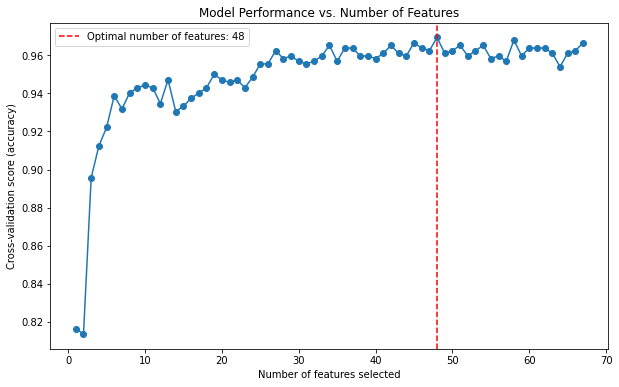

In [27]:
import matplotlib.pyplot as plt

# Plot the number of features against cross-validation scores
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")

# The cv_results_['mean_test_score'] gives the cross-validation scores
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], marker='o')
plt.title("Model Performance vs. Number of Features")
plt.axvline(optimal_num_features, color='r', linestyle='--', label=f'Optimal number of features: {optimal_num_features}')
plt.legend()
plt.show()

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score

# Load the data
df = pd.read_csv('features2.csv')
df.dropna(inplace=True)

# Separate features and labels
X = df.drop(columns=['label'])
y = df['label']

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf = RandomForestClassifier(n_estimators=16, max_leaf_nodes=23, random_state=42)

# Perform RFECV to select the optimal number of features
rfecv = RFECV(estimator=rf, step=1, cv=5, n_jobs=-1, scoring='accuracy')
# rfecv.fit(X_train, y_train)
rfecv.fit(X, y)

# Get the optimal number of features
optimal_num_features = rfecv.n_features_
print(f'Optimal number of features: {optimal_num_features}')

# Get the support and ranking of the features
selected_features = X_train.columns[rfecv.support_]
print(f'Selected features: {selected_features}')

# Get the performance of the model with the selected features
# y_pred = rfecv.predict(X_test)
# model_accuracy = accuracy_score(y_test, y_pred)
# print(f'Model accuracy with selected features: {model_accuracy}')

Optimal number of features: 62
Selected features: Index(['n_samples', 'gyro_mean_x', 'gyro_mean_y', 'gyro_mean_z', 'acce_mean_x',
       'acce_mean_y', 'acce_mean_z', 'gyro_std_x', 'gyro_std_y', 'gyro_std_z',
       'acce_std_x', 'acce_std_y', 'acce_std_z', 'gyro_variance_x',
       'gyro_variance_y', 'gyro_variance_z', 'acce_variance_x',
       'acce_variance_y', 'acce_variance_z', 'gyro_skew_x', 'gyro_skew_y',
       'gyro_skew_z', 'acce_skew_x', 'acce_skew_y', 'acce_skew_z',
       'gyro_kurt_x', 'gyro_kurt_y', 'gyro_kurt_z', 'acce_kurt_x',
       'acce_kurt_y', 'acce_kurt_z', 'gyro_max_y', 'acce_max_x', 'acce_max_y',
       'gyro_min_x', 'gyro_min_y', 'gyro_min_z', 'acce_min_x', 'acce_min_z',
       'gyro_range_x', 'gyro_range_y', 'gyro_range_z', 'acce_range_x',
       'acce_range_y', 'acce_range_z', 'gyro_rms_x', 'gyro_rms_y',
       'gyro_rms_z', 'acce_rms_x', 'acce_rms_y', 'acce_rms_z', 'gyro_energy_x',
       'gyro_energy_y', 'gyro_energy_z', 'acce_energy_x', 'acce_energy_y',
 

In [9]:
# Get the feature rankings
feature_rankings = pd.Series(rfecv.ranking_, index=X_train.columns)

# Sort the feature rankings and display them
sorted_feature_rankings = feature_rankings.sort_values()
print("Sorted feature rankings:")
print(sorted_feature_rankings)

Sorted feature rankings:
n_samples       1
acce_max_x      1
acce_max_y      1
gyro_min_x      1
gyro_min_y      1
               ..
acce_min_y      2
gyro_max_x      3
acce_max_z      4
acce_corr_yz    5
gyro_max_z      6
Length: 67, dtype: int64


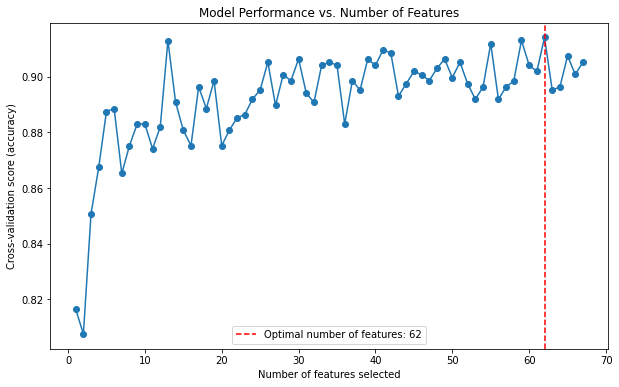

In [10]:
import matplotlib.pyplot as plt

# Plot the number of features against cross-validation scores
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")

# The cv_results_['mean_test_score'] gives the cross-validation scores
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], marker='o')
plt.title("Model Performance vs. Number of Features")
plt.axvline(optimal_num_features, color='r', linestyle='--', label=f'Optimal number of features: {optimal_num_features}')
plt.legend()
plt.show()

In [11]:
rfecv.cv_results_['mean_test_score']

array([0.81644941, 0.80747983, 0.85080074, 0.86747983, 0.88753569,
       0.88862197, 0.86524519, 0.87526381, 0.88306021, 0.88307883,
       0.87414649, 0.88193669, 0.91307263, 0.8908504 , 0.88083178,
       0.8752576 , 0.89641217, 0.88861577, 0.89863439, 0.87528243,
       0.8808504 , 0.88528243, 0.88641837, 0.89196772, 0.89530726,
       0.90528864, 0.8897455 , 0.90083799, 0.89860956, 0.90646182,
       0.89417132, 0.89081316, 0.90422098, 0.90526381, 0.90422098,
       0.88304159, 0.89863439, 0.89527002, 0.90641837, 0.90417753,
       0.9097455 , 0.90860956, 0.8930478 , 0.89752328, 0.90194289,
       0.90083178, 0.89862818, 0.90304159, 0.90643079, 0.89973929,
       0.90527002, 0.89750466, 0.89196151, 0.89639354, 0.91196151,
       0.89193048, 0.89638113, 0.89859094, 0.91311608, 0.90418994,
       0.90196151, 0.91418994, 0.89528243, 0.89638734, 0.90756673,
       0.90086282, 0.90530106])